# The Robert and Rosenbaum Uncertainty Zones model

# An application to USDMXN FX Futures at CME

## Implementation by
## Marcos Costa Santos Carreira (École Polytechnique - CMAP)
## and
## Florian Huchedé (CME)
## Aug-2019

## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import glob

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
pd.set_option('display.max_rows', 200)

In [4]:
import cme_processing as cme

## File paths and initial values

In [5]:
PATHPROJ = '/Users/marcoscscarreira/Documents/X/CME project/CME_data/'
URL_ROOT = 'https://raw.githubusercontent.com/MarcosCarreira/UZStats/master/CME_data/'

In [6]:
CURR = 'MXN'

In [7]:
PATH_PRIOR = PATHPROJ+CURR+'/prior/'
PATH_AFTER = PATHPROJ+CURR+'/after/'
URL_1 = CURR+'/prior/'
URL_2 = CURR+'/after/'
#PATH_PRIOR = URL_ROOT+URL_1
#PATH_AFTER = URL_ROOT+URL_2

In [8]:
TRADING_HOURS = 8

In [9]:
TICK_PRIOR = 12.5
TICK_AFTER = 5.0

In [10]:
PRIOR_CDATES_LIST = [['6MM4', '20140317'],
 ['6MM4', '20140318'],
 ['6MM4', '20140319'],
 ['6MM4', '20140320'],
 ['6MM4', '20140321'],
 ['6MM4', '20140324'],
 ['6MM4', '20140325'],
 ['6MM4', '20140326'],
 ['6MM4', '20140327'],
 ['6MM4', '20140328'],
 ['6MM4', '20140331'],
 ['6MM4', '20140401'],
 ['6MM4', '20140402'],
 ['6MM4', '20140403'],
 ['6MM4', '20140404'],
 ['6MM4', '20140407'],
 ['6MM4', '20140408'],
 ['6MM4', '20140409'],
 ['6MM4', '20140410'],
 ['6MM4', '20140411'],
 ['6MM4', '20140414'],
 ['6MM4', '20140415'],
 ['6MM4', '20140416'],
 ['6MM4', '20140417'],
 ['6MM4', '20140421'],
 ['6MM4', '20140422'],
 ['6MM4', '20140423'],
 ['6MM4', '20140424'],
 ['6MM4', '20140425'],
 ['6MM4', '20140428'],
 ['6MM4', '20140429'],
 ['6MM4', '20140430'],
 ['6MM4', '20140501'],
 ['6MM4', '20140502'],
 ['6MM4', '20140505'],
 ['6MM4', '20140506'],
 ['6MM4', '20140507'],
 ['6MM4', '20140508'],
 ['6MM4', '20140509'],
 ['6MM4', '20140512'],
 ['6MM4', '20140513'],
 ['6MM4', '20140514'],
 ['6MM4', '20140515'],
 ['6MM4', '20140516'],
 ['6MM4', '20140519'],
 ['6MM4', '20140520'],
 ['6MM4', '20140521'],
 ['6MM4', '20140522'],
 ['6MM4', '20140523'],
 ['6MM4', '20140526'],
 ['6MM4', '20140527'],
 ['6MM4', '20140528'],
 ['6MM4', '20140529'],
 ['6MM4', '20140530'],
 ['6MM4', '20140602'],
 ['6MM4', '20140603'],
 ['6MM4', '20140604'],
 ['6MM4', '20140605'],
 ['6MM4', '20140606'],
 ['6MM4', '20140609'],
 ['6MM4', '20140610'],
 ['6MM4', '20140611'],
 ['6MM4', '20140612'],
 ['6MM4', '20140613'],
 ['6MU4', '20140616'],
 ['6MU4', '20140617'],
 ['6MU4', '20140618'],
 ['6MU4', '20140619'],
 ['6MU4', '20140620'],
 ['6MU4', '20140623'],
 ['6MU4', '20140624'],
 ['6MU4', '20140625'],
 ['6MU4', '20140626'],
 ['6MU4', '20140627'],
 ['6MU4', '20140630'],
 ['6MU4', '20140701'],
 ['6MU4', '20140702'],
 ['6MU4', '20140703'],
 ['6MU4', '20140704'],
 ['6MU4', '20140707'],
 ['6MU4', '20140708'],
 ['6MU4', '20140709'],
 ['6MU4', '20140710'],
 ['6MU4', '20140711']]

In [11]:
AFTER_CDATES_LIST = [['6MU4', '20140715'],
 ['6MU4', '20140716'],
 ['6MU4', '20140717'],
 ['6MU4', '20140718'],
 ['6MU4', '20140721'],
 ['6MU4', '20140722'],
 ['6MU4', '20140723'],
 ['6MU4', '20140724'],
 ['6MU4', '20140725'],
 ['6MU4', '20140728'],
 ['6MU4', '20140729'],
 ['6MU4', '20140730'],
 ['6MU4', '20140731'],
 ['6MU4', '20140801'],
 ['6MU4', '20140804'],
 ['6MU4', '20140805'],
 ['6MU4', '20140806'],
 ['6MU4', '20140807'],
 ['6MU4', '20140808'],
 ['6MU4', '20140811'],
 ['6MU4', '20140812'],
 ['6MU4', '20140813'],
 ['6MU4', '20140814'],
 ['6MU4', '20140815'],
 ['6MU4', '20140818'],
 ['6MU4', '20140819'],
 ['6MU4', '20140820'],
 ['6MU4', '20140821'],
 ['6MU4', '20140822'],
 ['6MU4', '20140825'],
 ['6MU4', '20140826'],
 ['6MU4', '20140827'],
 ['6MU4', '20140828'],
 ['6MU4', '20140829'],
 ['6MU4', '20140901'],
 ['6MU4', '20140902'],
 ['6MU4', '20140903'],
 ['6MU4', '20140904'],
 ['6MU4', '20140905'],
 ['6MU4', '20140908'],
 ['6MU4', '20140909'],
 ['6MU4', '20140910'],
 ['6MU4', '20140911'],
 ['6MU4', '20140912'],
 ['6MZ4', '20140915'],
 ['6MZ4', '20140916'],
 ['6MZ4', '20140917'],
 ['6MZ4', '20140918'],
 ['6MZ4', '20140919'],
 ['6MZ4', '20140922'],
 ['6MZ4', '20140923'],
 ['6MZ4', '20140924'],
 ['6MZ4', '20140925'],
 ['6MZ4', '20140926'],
 ['6MZ4', '20140929'],
 ['6MZ4', '20140930'],
 ['6MZ4', '20141001'],
 ['6MZ4', '20141002'],
 ['6MZ4', '20141003'],
 ['6MZ4', '20141006'],
 ['6MZ4', '20141007'],
 ['6MZ4', '20141008'],
 ['6MZ4', '20141009'],
 ['6MZ4', '20141010'],
 ['6MZ4', '20141013'],
 ['6MZ4', '20141014'],
 ['6MZ4', '20141015'],
 ['6MZ4', '20141016'],
 ['6MZ4', '20141017'],
 ['6MZ4', '20141020'],
 ['6MZ4', '20141021'],
 ['6MZ4', '20141022'],
 ['6MZ4', '20141023'],
 ['6MZ4', '20141024'],
 ['6MZ4', '20141027'],
 ['6MZ4', '20141028'],
 ['6MZ4', '20141029'],
 ['6MZ4', '20141030'],
 ['6MZ4', '20141031'],
 ['6MZ4', '20141103'],
 ['6MZ4', '20141104'],
 ['6MZ4', '20141105'],
 ['6MZ4', '20141106'],
 ['6MZ4', '20141107']]

### Processing files

#### Prior

In [12]:
#PRIOR_CDATES_LIST = cme.list_files(PATH_PRIOR)

In [13]:
#PRIOR_CDATES_LIST

In [14]:
PRIOR_CDATES, FILES_PRIOR_CAticks, FILES_PRIOR_COSTtrades,\
    FILES_PRIOR_OBstats, FILES_PRIOR_OTtrans,\
    FILES_PRIOR_RDFtrans, FILES_PRIOR_UZstats = \
    cme.process_files(PATH_PRIOR, PRIOR_CDATES_LIST, 'prior', TICK_PRIOR)

In [15]:
PRIOR_OB_UZ_STATS = cme.ob_uz_stats(PRIOR_CDATES, FILES_PRIOR_OBstats,\
    FILES_PRIOR_UZstats, FILES_PRIOR_CAticks, TRADING_HOURS)

In [16]:
PRIOR_IMBAL_STATS = cme.imbal_stats(PRIOR_CDATES, FILES_PRIOR_OTtrans)

In [17]:
PRIOR_IMBAL_STATS_TS = cme.time_series_imbal(PRIOR_IMBAL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [18]:
PRIOR_IMBAL_STATS_TS['eta1'] = PRIOR_OB_UZ_STATS['eta1'].values

In [19]:
PRIOR_TRADE_STATS_TS = cme.time_series_imbal_trd(PRIOR_IMBAL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [20]:
PRIOR_DEPL_STATS = cme.depl_stats(PRIOR_CDATES, FILES_PRIOR_RDFtrans)

In [21]:
PRIOR_DEPL_STATS_TS = cme.time_series_depl(PRIOR_DEPL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [22]:
PRIOR_DEPL_STATS_TS['eta1'] = PRIOR_OB_UZ_STATS['eta1'].values

In [23]:
PRIOR_COST_STATS = cme.cost_stats(PRIOR_CDATES, FILES_PRIOR_COSTtrades)

In [24]:
PRIOR_COST_STATS['Status'] = 'prior'

#### After

In [25]:
#AFTER_CDATES_LIST = cme.list_files(PATH_AFTER)

In [26]:
#AFTER_CDATES_LIST

In [27]:
AFTER_CDATES, FILES_AFTER_CAticks, FILES_AFTER_COSTtrades,\
    FILES_AFTER_OBstats, FILES_AFTER_OTtrans,\
    FILES_AFTER_RDFtrans, FILES_AFTER_UZstats = \
    cme.process_files(PATH_AFTER, AFTER_CDATES_LIST, 'after', TICK_AFTER)

In [28]:
AFTER_OB_UZ_STATS = cme.ob_uz_stats(AFTER_CDATES, FILES_AFTER_OBstats,\
    FILES_AFTER_UZstats, FILES_AFTER_CAticks, TRADING_HOURS)

In [29]:
AFTER_IMBAL_STATS = cme.imbal_stats(AFTER_CDATES, FILES_AFTER_OTtrans)

In [30]:
AFTER_IMBAL_STATS_TS = cme.time_series_imbal(AFTER_IMBAL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [31]:
AFTER_IMBAL_STATS_TS['eta1'] = AFTER_OB_UZ_STATS['eta1'].values

In [32]:
AFTER_TRADE_STATS_TS = cme.time_series_imbal_trd(AFTER_IMBAL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [33]:
AFTER_DEPL_STATS = cme.depl_stats(AFTER_CDATES, FILES_AFTER_RDFtrans)

In [34]:
AFTER_DEPL_STATS_TS = cme.time_series_depl(AFTER_DEPL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [35]:
AFTER_DEPL_STATS_TS['eta1'] = AFTER_OB_UZ_STATS['eta1'].values

In [36]:
AFTER_COST_STATS = cme.cost_stats(AFTER_CDATES, FILES_AFTER_COSTtrades)

In [37]:
AFTER_COST_STATS['Status'] = 'after'

#### Join prior and after

In [38]:
OB_UZ_STATS = pd.concat([PRIOR_OB_UZ_STATS, AFTER_OB_UZ_STATS], sort=False)

In [39]:
IMBAL_STATS_TS = pd.concat([PRIOR_IMBAL_STATS_TS, AFTER_IMBAL_STATS_TS], sort=False)

In [40]:
TRADE_STATS_TS = pd.concat([PRIOR_TRADE_STATS_TS, AFTER_TRADE_STATS_TS], sort=False)

In [41]:
DEPL_STATS_TS = pd.concat([PRIOR_DEPL_STATS_TS, AFTER_DEPL_STATS_TS], sort=False)

### Tables

In [42]:
TABLE_MATHIEU = cme.table_mathieu(OB_UZ_STATS)
TABLE_MATHIEU_ERR = cme.table_mathieu_err(OB_UZ_STATS)

In [43]:
TABLE_MATHIEU

,Tick,chgavg,ndfpr_pred,ndfpr,M,Volume,eta1,S1,lambda1,twspr1,duration,dt_avg,rvxe,spot_avg
Status,,,,,,,,,,,,,,
prior,12.5,25.29264,225.56487,216.30952,2320.86905,17967.84524,0.19561,0.99115,0.99101,1.98578,181.30427,156.26856,0.00298,76526.34495
after,5.0,10.26207,836.96657,764.94048,4760.14286,26480.35714,0.32708,0.98637,0.98020,3.91033,48.68118,45.68789,0.00305,75181.17774


In [44]:
TABLE_MATHIEU_ERR

,Tick,chgavg,ndfpr_pred,ndfpr,M,Volume,eta1,S1,lambda1,twspr1,duration,dt_avg,rvxe,spot_avg
Status,,,,,,,,,,,,,,
prior,0.0,0.79256,112.96699,100.46542,1037.79493,9446.36725,0.06573,0.01611,0.01862,0.63259,128.24191,71.35749,0.00093,636.46699
after,0.0,0.53499,431.31235,380.01380,2072.08116,11225.19240,0.06079,0.02255,0.03244,2.04521,26.37475,20.97067,0.00094,1182.82920


In [45]:
cme.avg_perc_mat(PRIOR_IMBAL_STATS, pd.to_datetime(PRIOR_CDATES['Date']))

,Trade_Bid,Imbal_Bid,Neutral,Imbal_Ask,Trade_Ask,Total Cols
Trade_Bid,1.50,0.82,0.07,0.04,0.00,2.43
Imbal_Bid,0.51,32.44,1.31,0.05,0.14,34.45
Neutral,0.30,1.08,24.98,1.09,0.32,27.75
Imbal_Ask,0.13,0.06,1.31,30.88,0.53,32.90
Trade_Ask,0.00,0.05,0.08,0.85,1.48,2.46
Total Rows,2.43,34.45,27.75,32.90,2.46,100.00


In [46]:
cme.avg_perc_mat(AFTER_IMBAL_STATS, pd.to_datetime(AFTER_CDATES['Date']))

,Trade_Bid,Imbal_Bid,Neutral,Imbal_Ask,Trade_Ask,Total Cols
Trade_Bid,1.02,0.68,0.13,0.04,0.00,1.86
Imbal_Bid,0.41,29.36,1.34,0.36,0.15,31.63
Neutral,0.28,1.18,30.41,1.15,0.28,33.32
Imbal_Ask,0.15,0.37,1.31,29.05,0.42,31.30
Trade_Ask,0.00,0.04,0.12,0.70,1.04,1.90
Total Rows,1.86,31.63,33.31,31.30,1.90,100.00


In [47]:
cme.avg_perc_mat_2(PRIOR_DEPL_STATS, pd.to_datetime(PRIOR_CDATES['Date']))

same                      oppo                   Total Cols
             D C   D T  D T+F    F     D C   D T  D T+F   F             
 D C         0.07  0.02  0.04  33.25   0.06  0.01  1.49  0.23      35.16
 D T         0.00  0.02  0.16   9.97   0.00  0.00  1.89  0.65      12.70
D T+F        0.00  0.01  0.09   3.25   0.01  0.00  0.71  0.30       4.38
  F         23.55  4.08  0.00   0.04  11.45  8.58  0.00  0.06      47.77
Total Rows  23.63  4.12  0.29  46.51  11.53  8.59  4.09  1.25     100.00

In [48]:
cme.avg_perc_mat_2(AFTER_DEPL_STATS, pd.to_datetime(AFTER_CDATES['Date']))

same                     oppo                    Total Cols
             D C   D T  D T+F    F    D C    D T  D T+F   F             
 D C         0.04  0.03  0.14  29.48  0.04   0.01  0.93  1.00      31.65
 D T         0.01  0.05  0.27  12.80  0.02   0.01  1.69  1.68      16.54
D T+F        0.02  0.02  0.17   2.39  0.01   0.00  0.52  0.59       3.71
  F         23.16  6.23  0.00   0.07  8.36  10.19  0.00  0.08      48.09
Total Rows  23.22  6.33  0.57  44.74  8.43  10.21  3.14  3.34     100.00

## Charts and Regressions

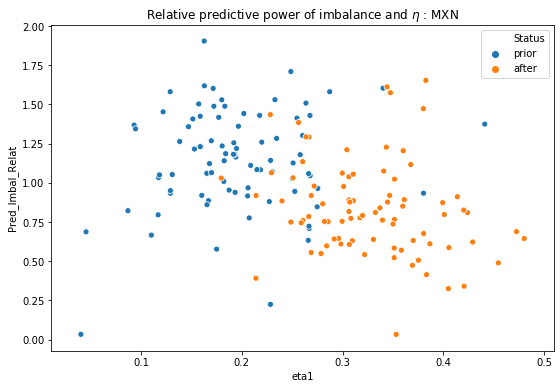

In [49]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='Pred_Imbal_Relat', hue='Status',\
           data=IMBAL_STATS_TS);
plt.title('Relative predictive power of imbalance and $\eta$ : '+CURR);

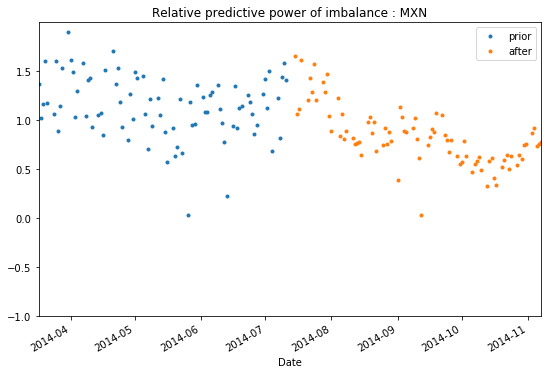

In [50]:
cme.time_series_plot(IMBAL_STATS_TS, 'Pred_Imbal_Relat',\
    'Relative predictive power of imbalance : '+CURR, -1)

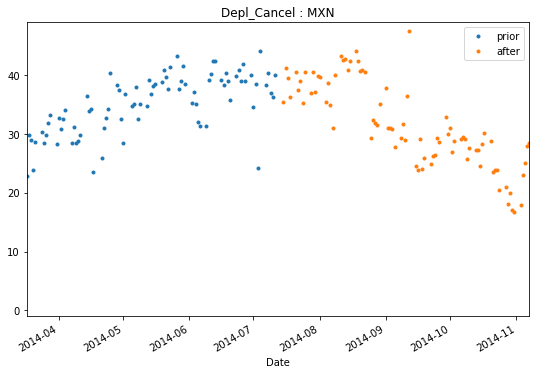

In [51]:
cme.time_series_plot(DEPL_STATS_TS, 'Depl_Cancel',\
    'Depl_Cancel : '+CURR, -1)

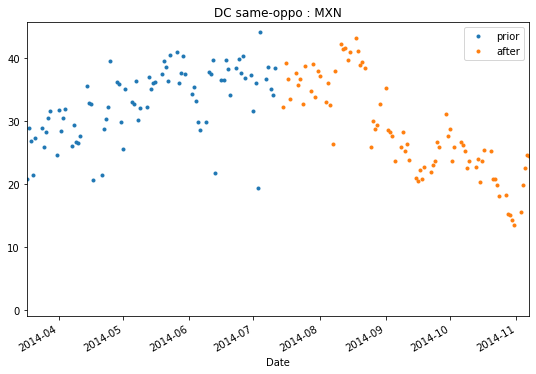

In [52]:
cme.time_series_plot(DEPL_STATS_TS, 'DC same-oppo',\
    'DC same-oppo : '+CURR, -1)

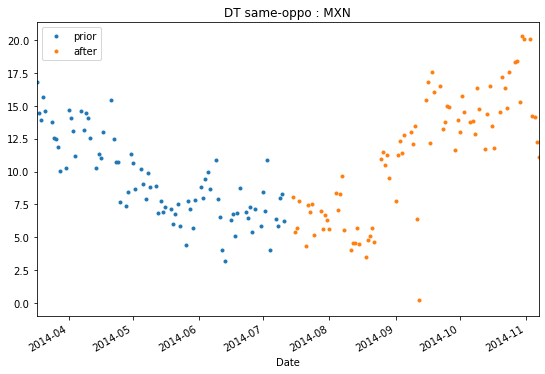

In [53]:
cme.time_series_plot(DEPL_STATS_TS, 'DT same-oppo',\
    'DT same-oppo : '+CURR, -1)

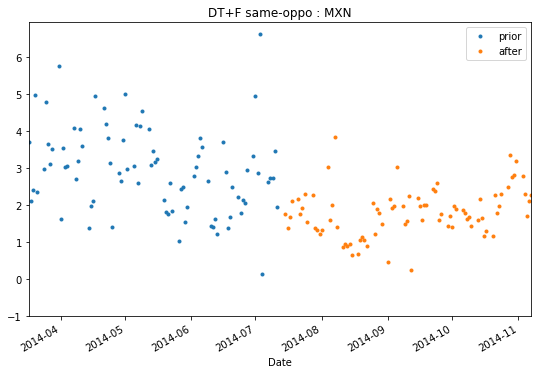

In [54]:
cme.time_series_plot(DEPL_STATS_TS, 'DT+F same-oppo',\
    'DT+F same-oppo : '+CURR, -1)

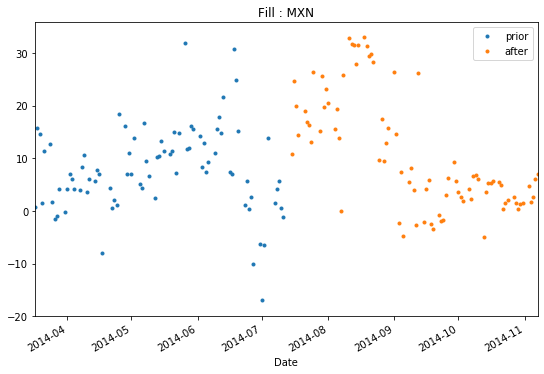

In [55]:
cme.time_series_plot(DEPL_STATS_TS, 'Fill same-oppo',\
    'Fill : '+CURR, -20)

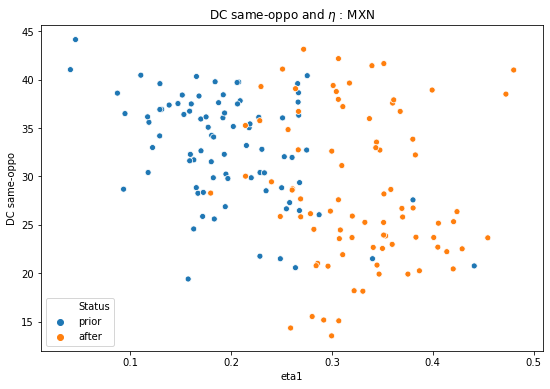

In [56]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='DC same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('DC same-oppo and $\eta$ : '+CURR);

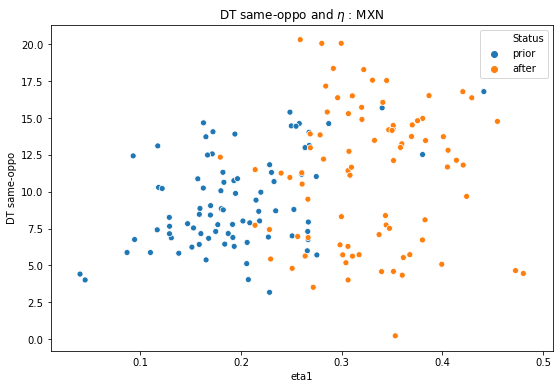

In [57]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='DT same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('DT same-oppo and $\eta$ : '+CURR);

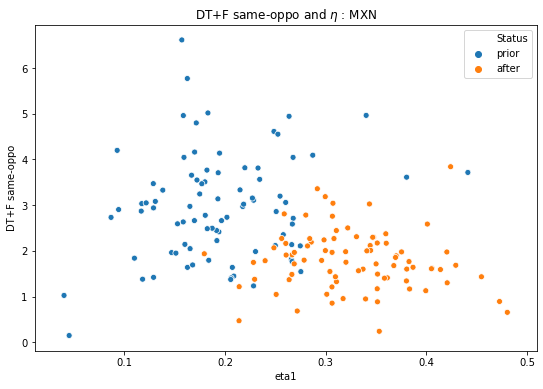

In [58]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='DT+F same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('DT+F same-oppo and $\eta$ : '+CURR);

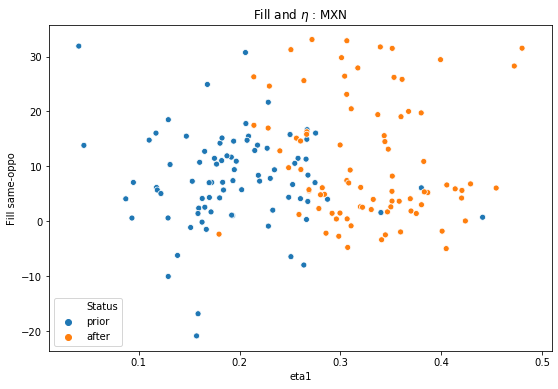

In [59]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='Fill same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('Fill and $\eta$ : '+CURR);

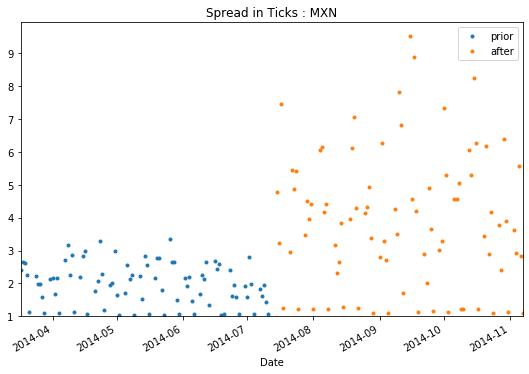

In [60]:
cme.time_series_plot(OB_UZ_STATS, 'twspr1', 'Spread in Ticks : '+CURR)

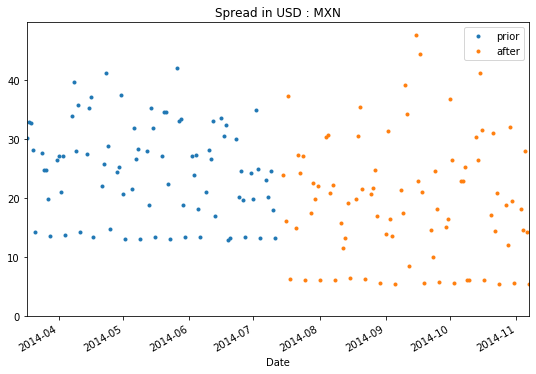

In [61]:
cme.twspr_plot_USD(OB_UZ_STATS, CURR)

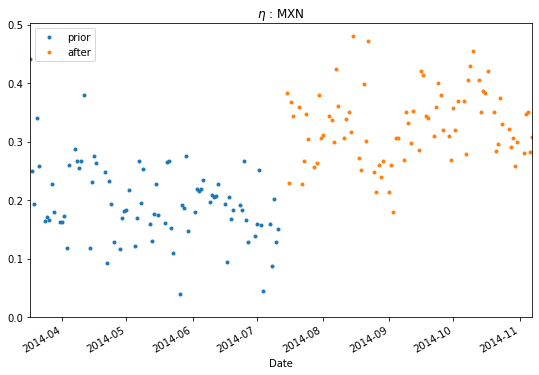

In [62]:
cme.time_series_plot(OB_UZ_STATS, 'eta1', '$\eta$ : '+CURR)

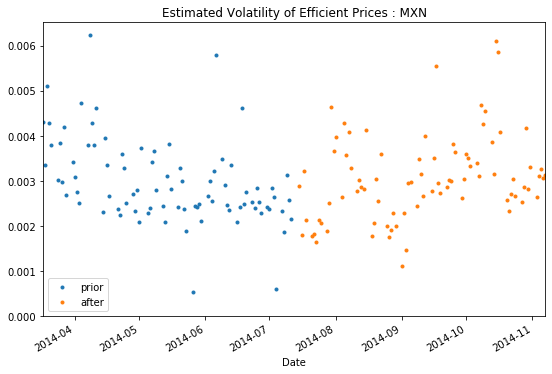

In [63]:
cme.time_series_plot(OB_UZ_STATS, 'rvxe',\
    'Estimated Volatility of Efficient Prices : '+CURR)

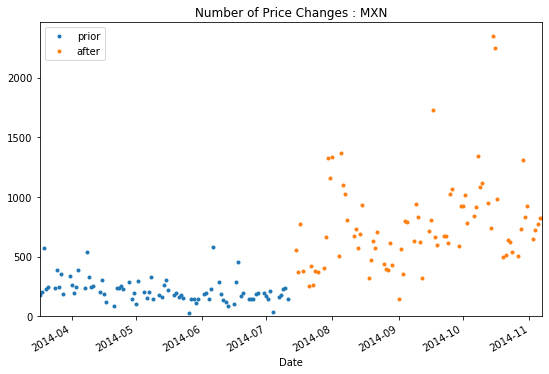

In [64]:
cme.time_series_plot(OB_UZ_STATS, 'ndfpr',\
    'Number of Price Changes : '+CURR)

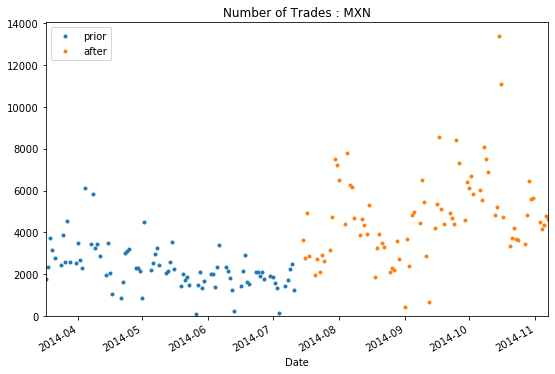

In [65]:
cme.time_series_plot(OB_UZ_STATS, 'M',\
    'Number of Trades : '+CURR)

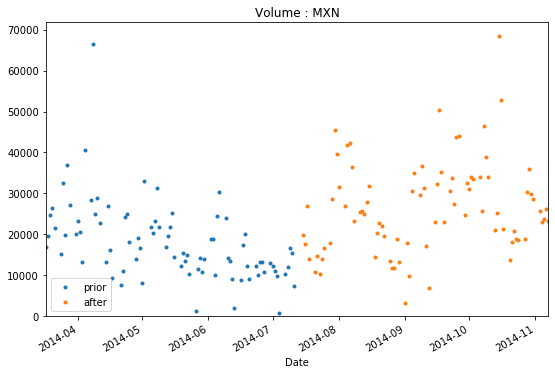

In [66]:
cme.time_series_plot(OB_UZ_STATS, 'Volume',\
    'Volume : '+CURR)

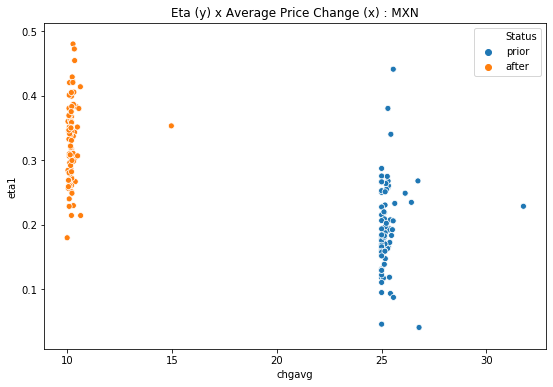

In [67]:
cme.scatter_plot(OB_UZ_STATS, 'chgavg', 'eta1',\
    'Eta (y) x Average Price Change (x) : '+CURR)

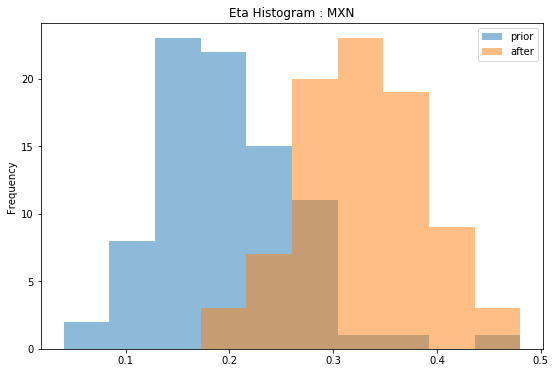

In [68]:
cme.time_series_hist(OB_UZ_STATS, 'eta1',\
    'Eta Histogram : '+CURR)

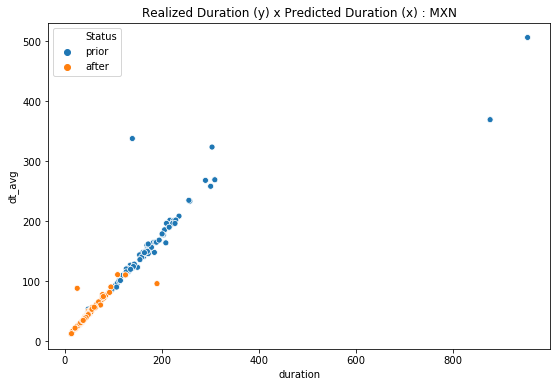

In [69]:
cme.scatter_plot(OB_UZ_STATS, 'duration', 'dt_avg',\
    'Realized Duration (y) x Predicted Duration (x) : '+CURR)

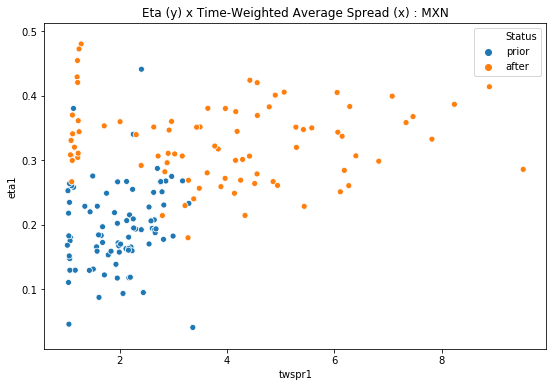

In [70]:
cme.scatter_plot(OB_UZ_STATS, 'twspr1', 'eta1',\
    'Eta (y) x Time-Weighted Average Spread (x) : '+CURR)

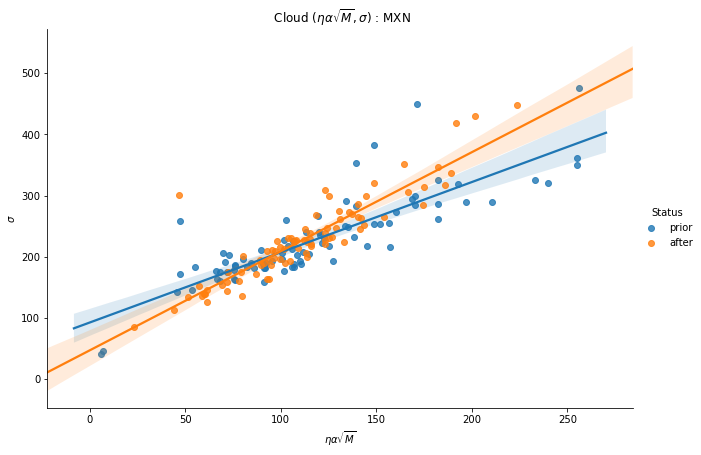

In [71]:
cme.cloud1(OB_UZ_STATS, CURR)

In [72]:
cme.lin_reg(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                            OLS Regression Results                            
Dep. Variable:                  sigma   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     112.1
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           4.61e-24
Time:                        13:28:38   Log-Likelihood:                -421.03
No. Observations:                  84   AIC:                             848.1
Df Residuals:                      81   BIC:                             855.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                80.8025     11.40

/Users/marcoscscarreira/anaconda3/envs/CondaEnv36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [73]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                    Robust linear Model Regression Results                    
Dep. Variable:                  sigma   No. Observations:                   84
Model:                            RLM   Df Residuals:                       81
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:28:38                                         
No. Iterations:                    17                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                85.3591      7.64

In [74]:
cme.lin_reg(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                            OLS Regression Results                            
Dep. Variable:                  sigma   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     189.2
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           2.99e-31
Time:                        13:28:38   Log-Likelihood:                -401.32
No. Observations:                  84   AIC:                             808.6
Df Residuals:                      81   BIC:                             815.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                45.7812      9.95

In [75]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                    Robust linear Model Regression Results                    
Dep. Variable:                  sigma   No. Observations:                   84
Model:                            RLM   Df Residuals:                       81
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:28:38                                         
No. Iterations:                    11                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                35.8344      7.08

In [76]:
OB_UZ_STATS['p1*eta*alpha*sqrt(M)'] = np.where(OB_UZ_STATS['Status']=='prior',\
    cme.lin_reg_params(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['eta*alpha*sqrt(M)'],\
    cme.lin_reg_params(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['eta*alpha*sqrt(M)'])\
    *OB_UZ_STATS['eta*alpha*sqrt(M)']
OB_UZ_STATS['sigma-p2*S*sqrt(M)'] = OB_UZ_STATS['sigma']-\
    np.where(OB_UZ_STATS['Status']=='prior',\
    cme.lin_reg_params(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['S*sqrt(M)'],\
    cme.lin_reg_params(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['S*sqrt(M)'])*\
    OB_UZ_STATS['S*sqrt(M)']

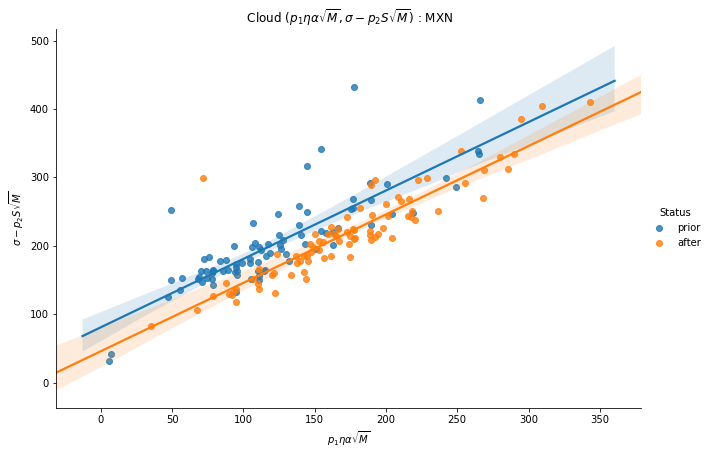

In [77]:
cme.cloud2(OB_UZ_STATS, CURR)

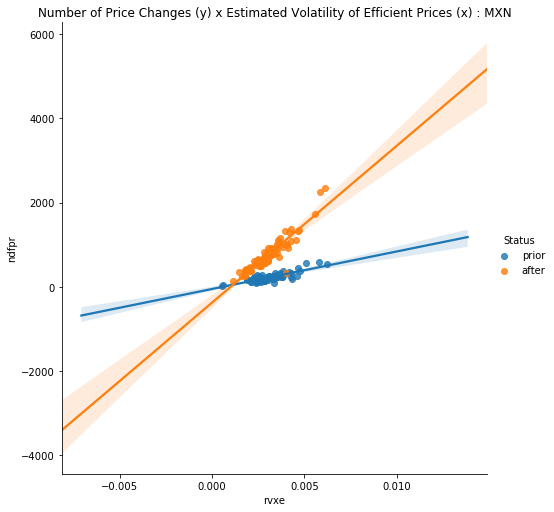

In [78]:
cme.regr_plot(OB_UZ_STATS, 'rvxe', 'ndfpr',\
    'Number of Price Changes (y) x Estimated Volatility of Efficient Prices (x) : '+CURR)

In [79]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     199.4
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           1.16e-23
Time:                        13:28:39   Log-Likelihood:                -4.5209
No. Observations:                  84   AIC:                             13.04
Df Residuals:                      82   BIC:                             17.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.8364      0.466     25.423      0.0

In [80]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                   84
Model:                            RLM   Df Residuals:                       82
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:28:39                                         
No. Iterations:                    13                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9610      0.442     27.087      0.0

In [81]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     441.4
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           9.40e-35
Time:                        13:28:39   Log-Likelihood:                 21.816
No. Observations:                  84   AIC:                            -39.63
Df Residuals:                      82   BIC:                            -34.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.7350      0.391     37.684      0.0

In [82]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                   84
Model:                            RLM   Df Residuals:                       82
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:28:39                                         
No. Iterations:                    17                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0254      0.295     50.907      0.0

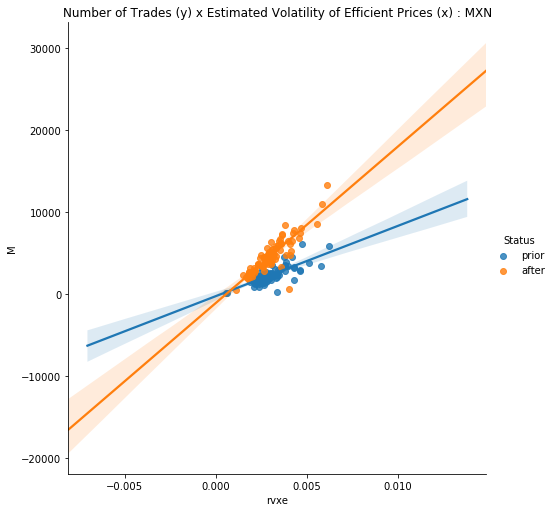

In [83]:
cme.regr_plot(OB_UZ_STATS, 'rvxe', 'M',\
    'Number of Trades (y) x Estimated Volatility of Efficient Prices (x) : '+CURR)

In [84]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'rvxe', 'M', True)

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     141.3
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           1.61e-19
Time:                        13:28:39   Log-Likelihood:                -34.423
No. Observations:                  84   AIC:                             72.85
Df Residuals:                      82   BIC:                             77.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.5053      0.665     23.329      0.0

In [85]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'rvxe', 'M', True)

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                   84
Model:                            RLM   Df Residuals:                       82
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:28:39                                         
No. Iterations:                    26                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.4626      0.510     30.316      0.0

In [86]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'rvxe', 'M', True)

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     127.2
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           2.37e-18
Time:                        13:28:39   Log-Likelihood:                -21.686
No. Observations:                  84   AIC:                             47.37
Df Residuals:                      82   BIC:                             52.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.7545      0.656     24.005      0.0

In [87]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'rvxe', 'M', True)

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                   84
Model:                            RLM   Df Residuals:                       82
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:28:39                                         
No. Iterations:                    18                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.7387      0.357     44.040      0.0

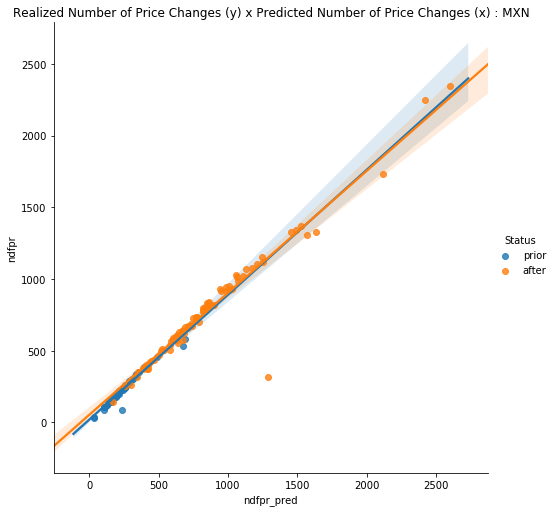

In [88]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr_pred', 'ndfpr',\
    'Realized Number of Price Changes (y) x Predicted Number of Price Changes (x) : '+CURR)

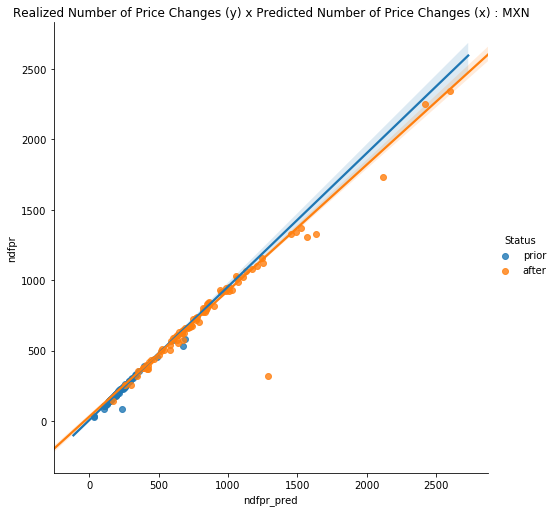

In [89]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr_pred', 'ndfpr',\
    'Realized Number of Price Changes (y) x Predicted Number of Price Changes (x) : '+CURR, True)

In [90]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     1899.
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           1.76e-58
Time:                        13:28:51   Log-Likelihood:                -372.15
No. Observations:                  84   AIC:                             748.3
Df Residuals:                      82   BIC:                             753.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9022      5.034      3.953      0.0

In [91]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                   84
Model:                            RLM   Df Residuals:                       82
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:28:51                                         
No. Iterations:                    21                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6384      1.448      4.585      0.0

In [92]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     1117.
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           1.54e-49
Time:                        13:28:51   Log-Likelihood:                -504.99
No. Observations:                  84   AIC:                             1014.
Df Residuals:                      82   BIC:                             1019.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.1746     23.924      2.223      0.0

In [93]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                   84
Model:                            RLM   Df Residuals:                       82
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:28:51                                         
No. Iterations:                    17                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.9628      6.459      4.794      0.0

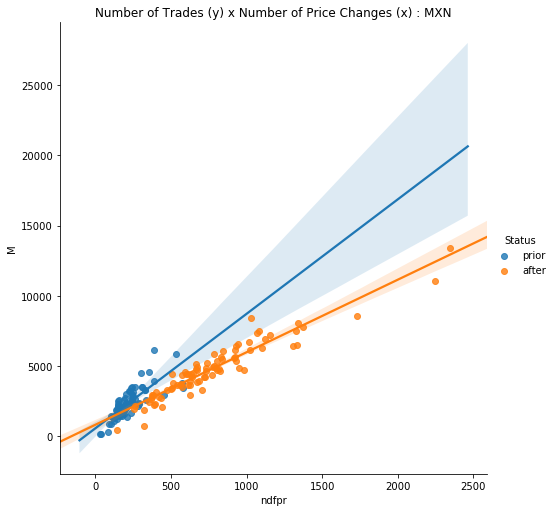

In [94]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr', 'M',\
    'Number of Trades (y) x Number of Price Changes (x) : '+CURR)

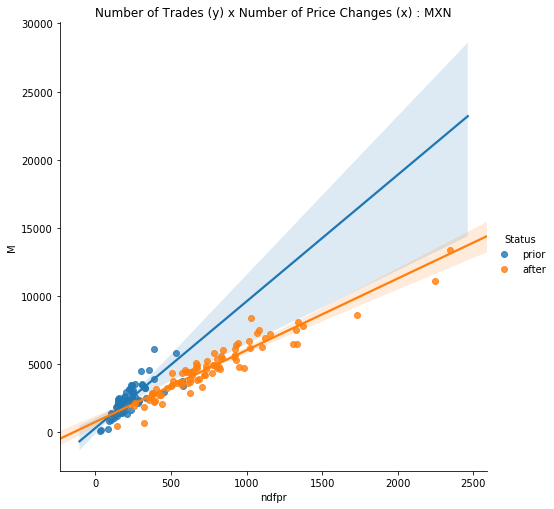

In [95]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr', 'M',\
    'Number of Trades (y) x Number of Price Changes (x) : '+CURR, True)

In [96]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'ndfpr', 'M')

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     136.0
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           4.28e-19
Time:                        13:28:57   Log-Likelihood:                -660.99
No. Observations:                  84   AIC:                             1326.
Df Residuals:                      82   BIC:                             1331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        555.9551    166.679      3.335      0.0

In [97]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'ndfpr', 'M')

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                   84
Model:                            RLM   Df Residuals:                       82
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:28:57                                         
No. Iterations:                    12                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        324.7431    141.059      2.302      0.0

In [98]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'ndfpr', 'M')

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     730.1
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           1.38e-42
Time:                        13:28:57   Log-Likelihood:                -663.84
No. Observations:                  84   AIC:                             1332.
Df Residuals:                      82   BIC:                             1337.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        805.3680    163.235      4.934      0.0

In [99]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'ndfpr', 'M')

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                   84
Model:                            RLM   Df Residuals:                       82
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:28:57                                         
No. Iterations:                    12                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        767.6803    153.259      5.009      0.0

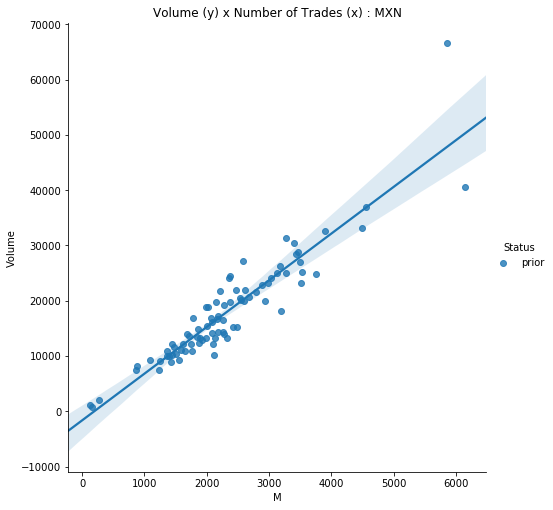

In [100]:
cme.regr_plot(PRIOR_OB_UZ_STATS, 'M', 'Volume',\
    'Volume (y) x Number of Trades (x) : '+CURR)

In [101]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'M', 'Volume')

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     510.3
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           5.85e-37
Time:                        13:28:58   Log-Likelihood:                -804.53
No. Observations:                  84   AIC:                             1613.
Df Residuals:                      82   BIC:                             1618.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1640.7218    949.912     -1.727      0.0

In [102]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'M', 'Volume')

                    Robust linear Model Regression Results                    
Dep. Variable:                 Volume   No. Observations:                   84
Model:                            RLM   Df Residuals:                       82
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:28:58                                         
No. Iterations:                     5                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -664.6476    722.481     -0.920      0.3

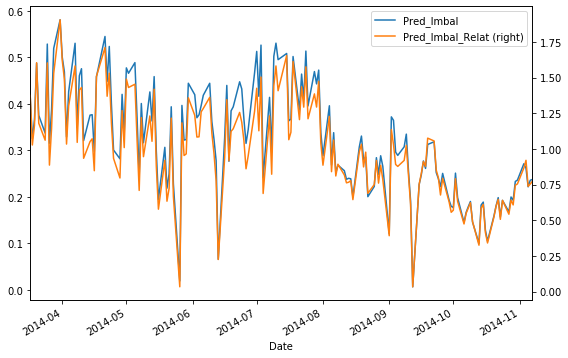

In [103]:
IMBAL_STATS_TS.drop(columns=['eta1']).plot(secondary_y=['Pred_Imbal_Relat'], figsize=(9,6));

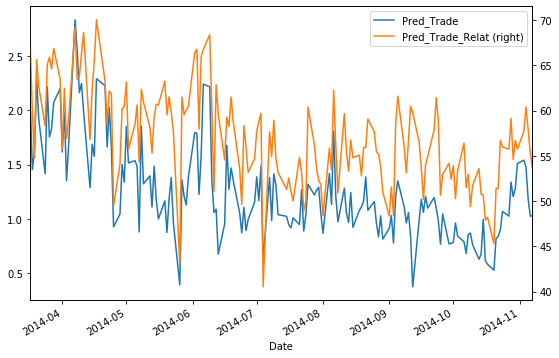

In [104]:
TRADE_STATS_TS.plot(secondary_y=['Pred_Trade_Relat'], figsize=(9,6));

In [105]:
OB_UZ_STATS_SPREADS = cme.spread_stats(OB_UZ_STATS)

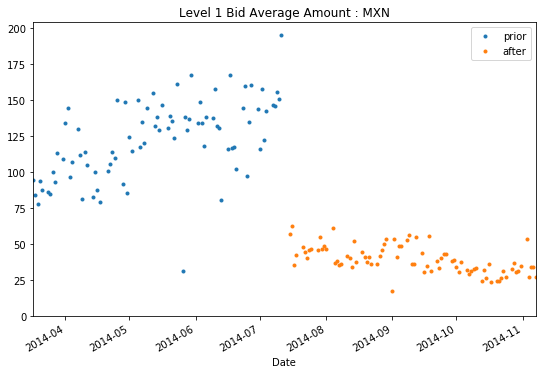

In [106]:
cme.time_series_plot(OB_UZ_STATS_SPREADS, 'bid1qty',\
    'Level 1 Bid Average Amount : '+CURR)

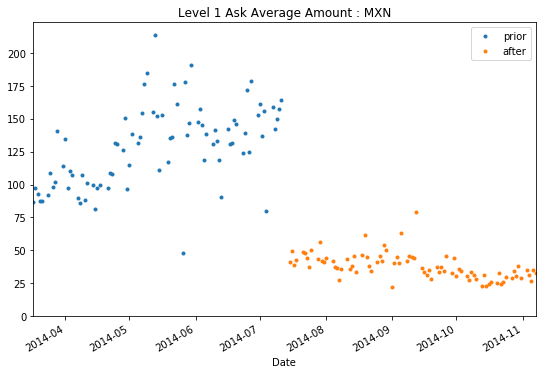

In [107]:
cme.time_series_plot(OB_UZ_STATS_SPREADS, 'ask1qty',\
    'Level 1 Ask Average Amount : '+CURR)

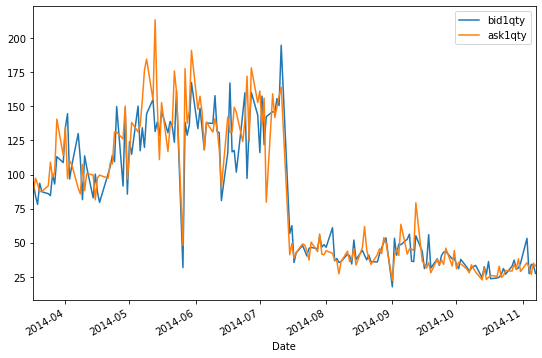

In [108]:
OB_UZ_STATS_SPREADS[['bid1qty', 'ask1qty']].plot(figsize=(9,6));

In [109]:
OB_UZ_STATS_SPREADS[OB_UZ_STATS_SPREADS['Status'] == 'prior'][['bid1qty', 'ask1qty']].mean()/\
    OB_UZ_STATS_SPREADS[OB_UZ_STATS_SPREADS['Status'] == 'after'][['bid1qty', 'ask1qty']].mean()

bid1qty    3.120109
ask1qty    3.379427
dtype: float64

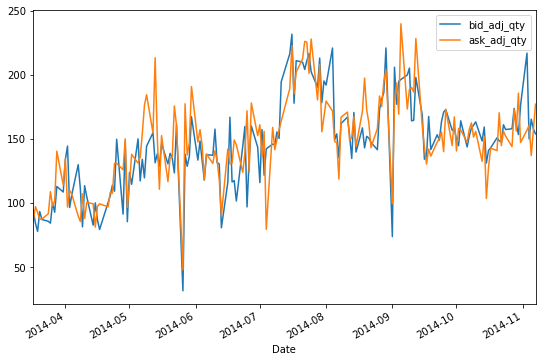

In [110]:
OB_UZ_STATS_SPREADS[['bid_adj_qty', 'ask_adj_qty']].plot(figsize=(9,6));

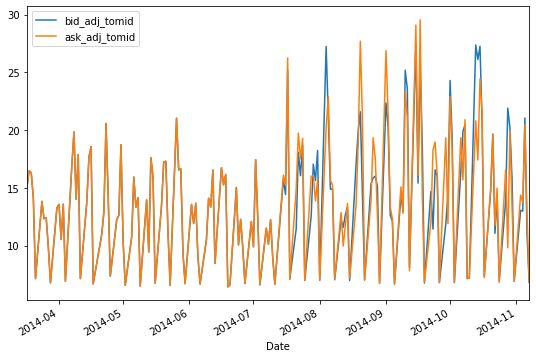

In [111]:
OB_UZ_STATS_SPREADS[['bid_adj_tomid', 'ask_adj_tomid']].plot(figsize=(9,6));

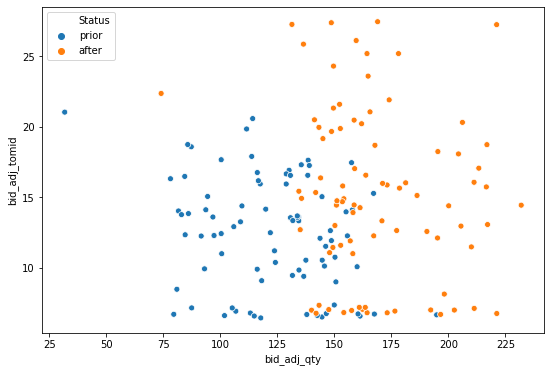

In [112]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='bid_adj_qty', y='bid_adj_tomid',\
                hue='Status', data=OB_UZ_STATS_SPREADS);

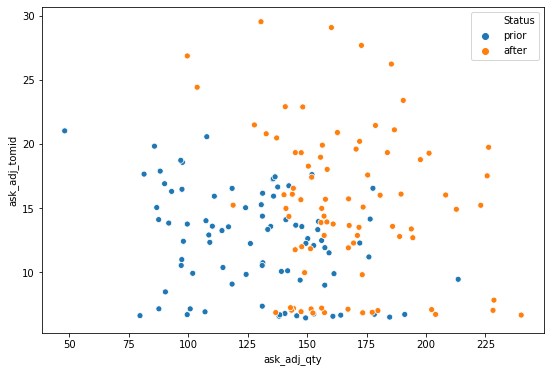

In [113]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='ask_adj_qty', y='ask_adj_tomid',\
                hue='Status', data=OB_UZ_STATS_SPREADS);

### Costs

In [114]:
PRIOR_MEAN_COST = cme.cost_mean(PRIOR_COST_STATS, 50)

In [115]:
PRIOR_MEAN_COST['Status'] = 'prior'

In [116]:
AFTER_MEAN_COST = cme.cost_mean(AFTER_COST_STATS, 50)

In [117]:
AFTER_MEAN_COST['Status'] = 'after'

In [118]:
MEAN_COST_STATS = pd.concat([PRIOR_MEAN_COST, AFTER_MEAN_COST], sort=False)

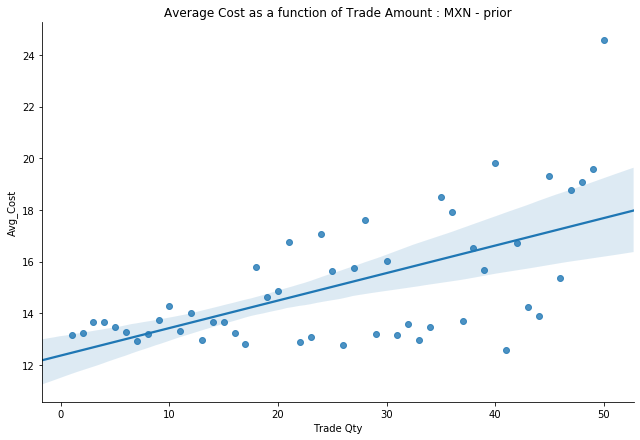

In [119]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=PRIOR_MEAN_COST.reset_index(),\
          height=6, aspect=1.5);
plt.title('Average Cost as a function of Trade Amount : '+CURR+' - prior');

In [120]:
cme.lin_reg(cme.cost_mean(PRIOR_COST_STATS, 25).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     9.359
Date:                Mon, 02 Sep 2019   Prob (F-statistic):            0.00556
Time:                        13:29:00   Log-Likelihood:                -35.109
No. Observations:                  25   AIC:                             74.22
Df Residuals:                      23   BIC:                             76.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8219      0.424     30.266      0.0

In [121]:
cme.lin_reg_rob(cme.cost_mean(PRIOR_COST_STATS, 25).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                   25
Model:                            RLM   Df Residuals:                       23
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:29:00                                         
No. Iterations:                    23                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8991      0.395     32.618      0.0

In [122]:
cme.lin_reg(cme.cost_mean(PRIOR_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     29.25
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           1.98e-06
Time:                        13:29:00   Log-Likelihood:                -104.82
No. Observations:                  50   AIC:                             213.6
Df Residuals:                      48   BIC:                             217.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3583      0.577     21.418      0.0

In [123]:
cme.lin_reg_rob(cme.cost_mean(PRIOR_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                   50
Model:                            RLM   Df Residuals:                       48
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:29:00                                         
No. Iterations:                    10                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.5205      0.535     23.382      0.0

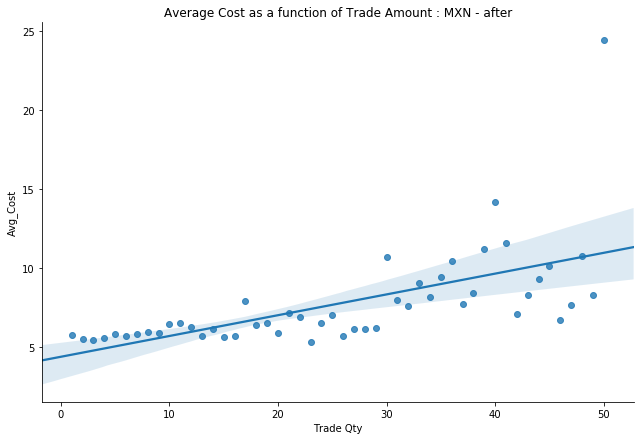

In [124]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=AFTER_MEAN_COST.reset_index(),\
          height=6, aspect=1.5);
plt.title('Average Cost as a function of Trade Amount : '+CURR+' - after');

In [125]:
cme.lin_reg(cme.cost_mean(AFTER_COST_STATS, 25).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     9.336
Date:                Mon, 02 Sep 2019   Prob (F-statistic):            0.00561
Time:                        13:29:01   Log-Likelihood:                -18.937
No. Observations:                  25   AIC:                             41.87
Df Residuals:                      23   BIC:                             44.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5415      0.222     24.979      0.0

In [126]:
cme.lin_reg_rob(cme.cost_mean(AFTER_COST_STATS, 25).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                   25
Model:                            RLM   Df Residuals:                       23
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:29:01                                         
No. Iterations:                    16                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4907      0.186     29.444      0.0

In [127]:
cme.lin_reg(cme.cost_mean(AFTER_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     29.43
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           1.87e-06
Time:                        13:29:01   Log-Likelihood:                -115.26
No. Observations:                  50   AIC:                             234.5
Df Residuals:                      48   BIC:                             238.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3779      0.711      6.158      0.0

In [128]:
cme.lin_reg_rob(cme.cost_mean(AFTER_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                   50
Model:                            RLM   Df Residuals:                       48
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:29:01                                         
No. Iterations:                    24                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9812      0.373     13.339      0.0

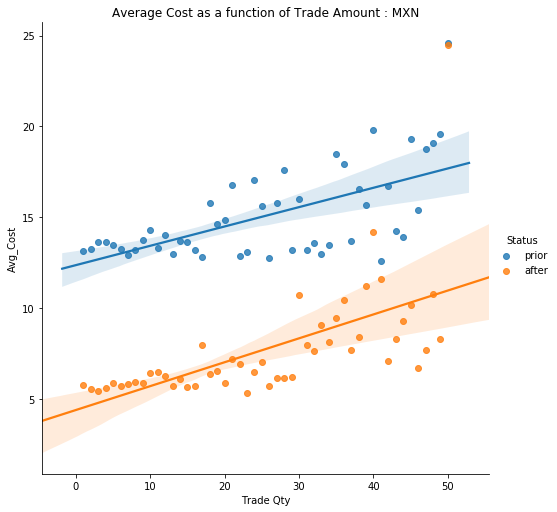

In [129]:
cme.regr_plot(MEAN_COST_STATS.reset_index(), 'Trade Qty', 'Avg_Cost',\
    'Average Cost as a function of Trade Amount : '+CURR)

## Eta prediction

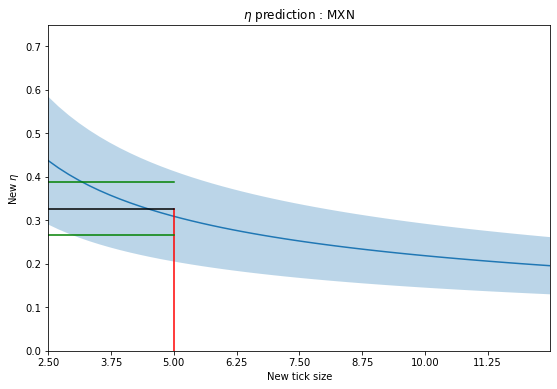

In [130]:
cme.plot_eta(TICK_PRIOR, TICK_AFTER,\
    TABLE_MATHIEU.loc['prior']['eta1'], TABLE_MATHIEU.loc['after']['eta1'],\
    TABLE_MATHIEU_ERR.loc['prior']['eta1'], TABLE_MATHIEU_ERR.loc['after']['eta1'],\
    CURR)